ლექციის მიზანია შევისწავლოთ EDA-ს საფუძვლები. 
პირველ რიგში შემოვიტანოთ საჭირო ბიბლიოთეკები და მონაცემები რომელთაც გამოვიყენებთ მონაცემების ანალიზისთვის.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('US_Accidents_Dec20_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [5]:
df.shape

(1516064, 47)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [5]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages


Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
City                     0.000055
Country                  0.000000
Give_Way                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop                     0.000000
Station                  0.000000
Roundabout    

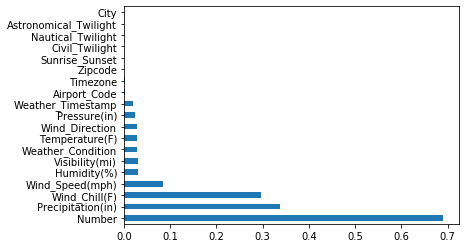

In [6]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

In [7]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

1.City
2.Start_Time
3.Start_Lat, Start_Lng
4.Temperature
5.Weather Condition

In [8]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [9]:
'New York' in df.City

False

In [10]:
cities = df.City.unique()
len(cities)

10658

In [4]:
df.City.nunique()

10657

In [11]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
               ...  
Norborne           1
Eastham            1
Dacono             1
Higden             1
Mesick             1
Name: City, Length: 10657, dtype: int64

In [12]:
cities_by_accident[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

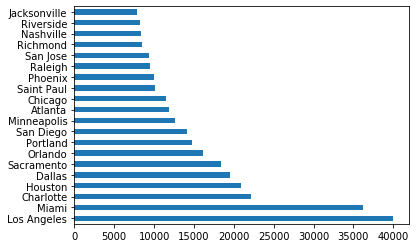

In [13]:
cities_by_accident[:20].plot(kind='barh')

ვნახოთ განაწილება როგორ გამოიყურება, ბევრ ქალაქვს აქვს ბევრი ავარია, ცოტა ქალაქს აქვს ბევრი ავარია ა.შ

In [11]:
sns.set_style("darkgrid")

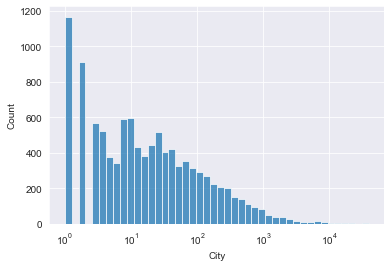

In [15]:
sns.histplot(cities_by_accident, log_scale=True)

ჩანს რომ ბევრ ქალაქს აქვს 0 ავარია, რაც არასწორს გავს (შეიძლება ველები არ არის შევსებული missing values), შეიძლება ასეთ დროს მონაცემებს პრობლემა აქვთ.

In [16]:
high_accident_cities=cities_by_accident[cities_by_accident>=1000]
low_accident_cities=cities_by_accident[cities_by_accident<1000]

In [17]:
len(high_accident_cities)/len(cities)

0.023550384687558643

In [18]:
cities_by_accident[cities_by_accident == 1]

Carney            1
Anthem            1
Estill Springs    1
Heber Springs     1
East Dorset       1
                 ..
Norborne          1
Eastham           1
Dacono            1
Higden            1
Mesick            1
Name: City, Length: 1167, dtype: int64

In [19]:
#df=df[df['City'].isin(cities_by_accident[cities_by_accident > 1].index)]

In [20]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [9]:
df.Start_Time = pd.to_datetime(df.Start_Time)

C:\Users\George Ch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


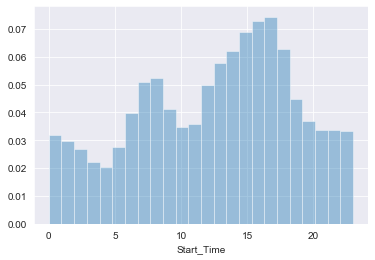

In [12]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

C:\Users\George Ch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


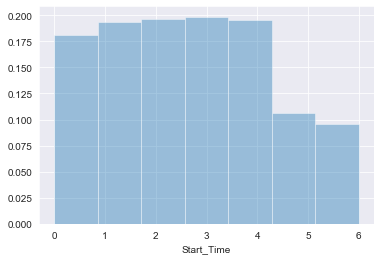

In [23]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

C:\Users\George Ch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


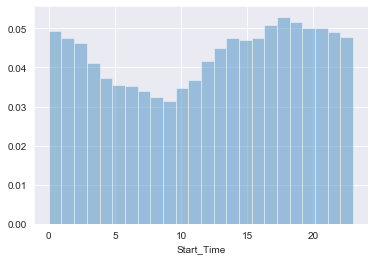

In [24]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

C:\Users\George Ch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


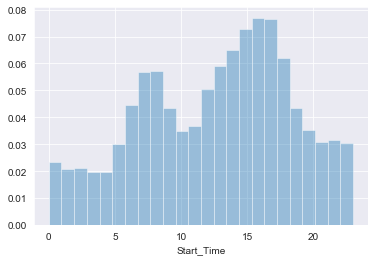

In [25]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

In [24]:
df_2017=df[df.Start_Time.dt.year==2017]

C:\Users\George Ch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


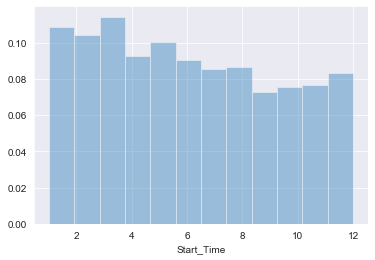

In [25]:
sns.distplot(df_2017.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

ნამდვილი ტრენდია თუ მონაცემებს აქვთ პრობლემა?

In [33]:
df.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [34]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

In [35]:
sample_df = df.sample(int(0.1 * len(df)))

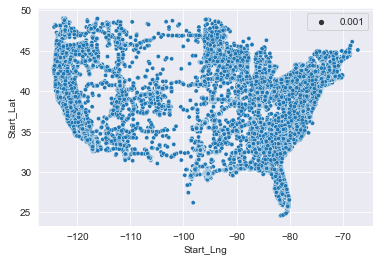

In [36]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [39]:
# ! pip install folium

In [40]:
import folium

In [41]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [42]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

969726     34.136097
1466643    33.511689
55407      28.323850
1378443    45.509650
1245270    32.685560
             ...    
1151420    40.669040
569473     32.796204
99164      33.384940
1214204    42.433165
918407     35.008530
Name: Start_Lat, Length: 100, dtype: float64
969726    -117.331106
1466643    -84.576307
55407      -82.495980
1378443   -122.727164
1245270    -97.240380
              ...    
1151420    -73.993030
569473     -96.809456
99164     -111.968220
1214204   -122.903910
918407     -85.153200
Name: Start_Lng, Length: 100, dtype: float64


In [43]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [44]:
from folium.plugins import HeatMap

In [45]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [46]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

1. უფრო მეტი ავარია თბილ შტატებში ხდება თუ ცივში?
2. როელ შტატებს გააჩნიათ ყველაზე დიდი რაოდენობა ავარიების? (per capita?)
(ამოვწეროთ მსგავსი კიტხვები გზადაგზა)
3. ტოპ 100 ქალაქი ავარიების მიხედვით რომელ შტატებს მიეკუთვნებიან (შტატის სიხშირე)?
4. დღის რომელ მონაკვეთშია ავარები ყველაზე ხშირი
5.კვირის რომელ დღეებში ხდება ყველაზე მეტი ავარია
6. რომელ თვეს ხდება ყველაზე მეტი ავარია
7. წლიდან წლამდე როგორი ტრენდია, კლებადი/ ზრდადი?
8 ავარიების განაწილება კვირის დღეებში vs სამუშაო დღეებში
9. შეგვიძლია ავხსნათ ავარიების თვეების მიხედვით ტრენდი?


Insights
ნიუ იორკის შესახებ მონაცემები არ არის

2.3% ზე მეტ ქალაქს აქვს ყოველწლიურად 1000 ზე მეტი ავარია

1167 ქალაქში მოხდა მხოლოდ 1 ავარია.(გამოსაკვლევია, არაა სანდო)

ავარიების რაოდენობა ქალაქების მხედვით ექსპონენციალურად იკლებს

ძირითადი ავარიები მოდის მარკვენა და მარცხენა საპანიროზე.

ა.შ


In [3]:
import dtale

C:\Users\George Ch\anaconda3\lib\site-packages\dash_bootstrap_components\_table.py:5: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [4]:
df_s=df.sample(n=50000, random_state=1)

In [5]:
dtale.show(df_s)

2021-10-17 13:20:12,528 - INFO     - NumExpr defaulting to 8 threads.


In [1]:
!pip install -U notebook-as-pdf

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61085 sha256=55d99b5f882a5e89b8a9a806a2d4d6e1cf18986778153cb01f626ec9b7aaaf78
  Stored in directory: c:\users\george ch\appdata\local\pip\cache\wheels\80\1a\24\648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.22.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
kaggle 1.5.6 requires urllib3<1.25,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
botocore 1.18.0 requires urllib3<1.26,>=1.20, but you have urllib3 1.26.7 which is incompatible.
